# Importing Data and Libraries

In [59]:
import datetime

from sklearn.metrics import mean_squared_log_error

from sklearn.metrics import mean_squared_error

import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.ensemble import RandomForestRegressor

import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

In [242]:
df_sport = pd.read_csv('sport_preprocessed.csv')

In [243]:
df_sport.drop(columns = ['Sport Leads', 'Sport Follows'], inplace = True)

In [244]:
df_sport.head()

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,numerical_difficulty,max_month,avg_month,sport_ticks_this_month
0,2020-12-19,Aidan Shelburne,12,2020-12,Male,21.0,5.11b,TR,NaN,1.0,15.0,15.0,15.00,1
1,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.11a,Lead,Onsight,1.0,14.0,14.0,11.75,4
2,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10a,Lead,NaN,1.0,10.0,14.0,11.75,4
3,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,11.5,14.0,11.75,4
4,2020-08-06,Aidan Shelburne,8,2020-08,Male,21.0,5.10,Lead,NaN,1.0,11.5,14.0,11.75,4


# Some Bonus EDA

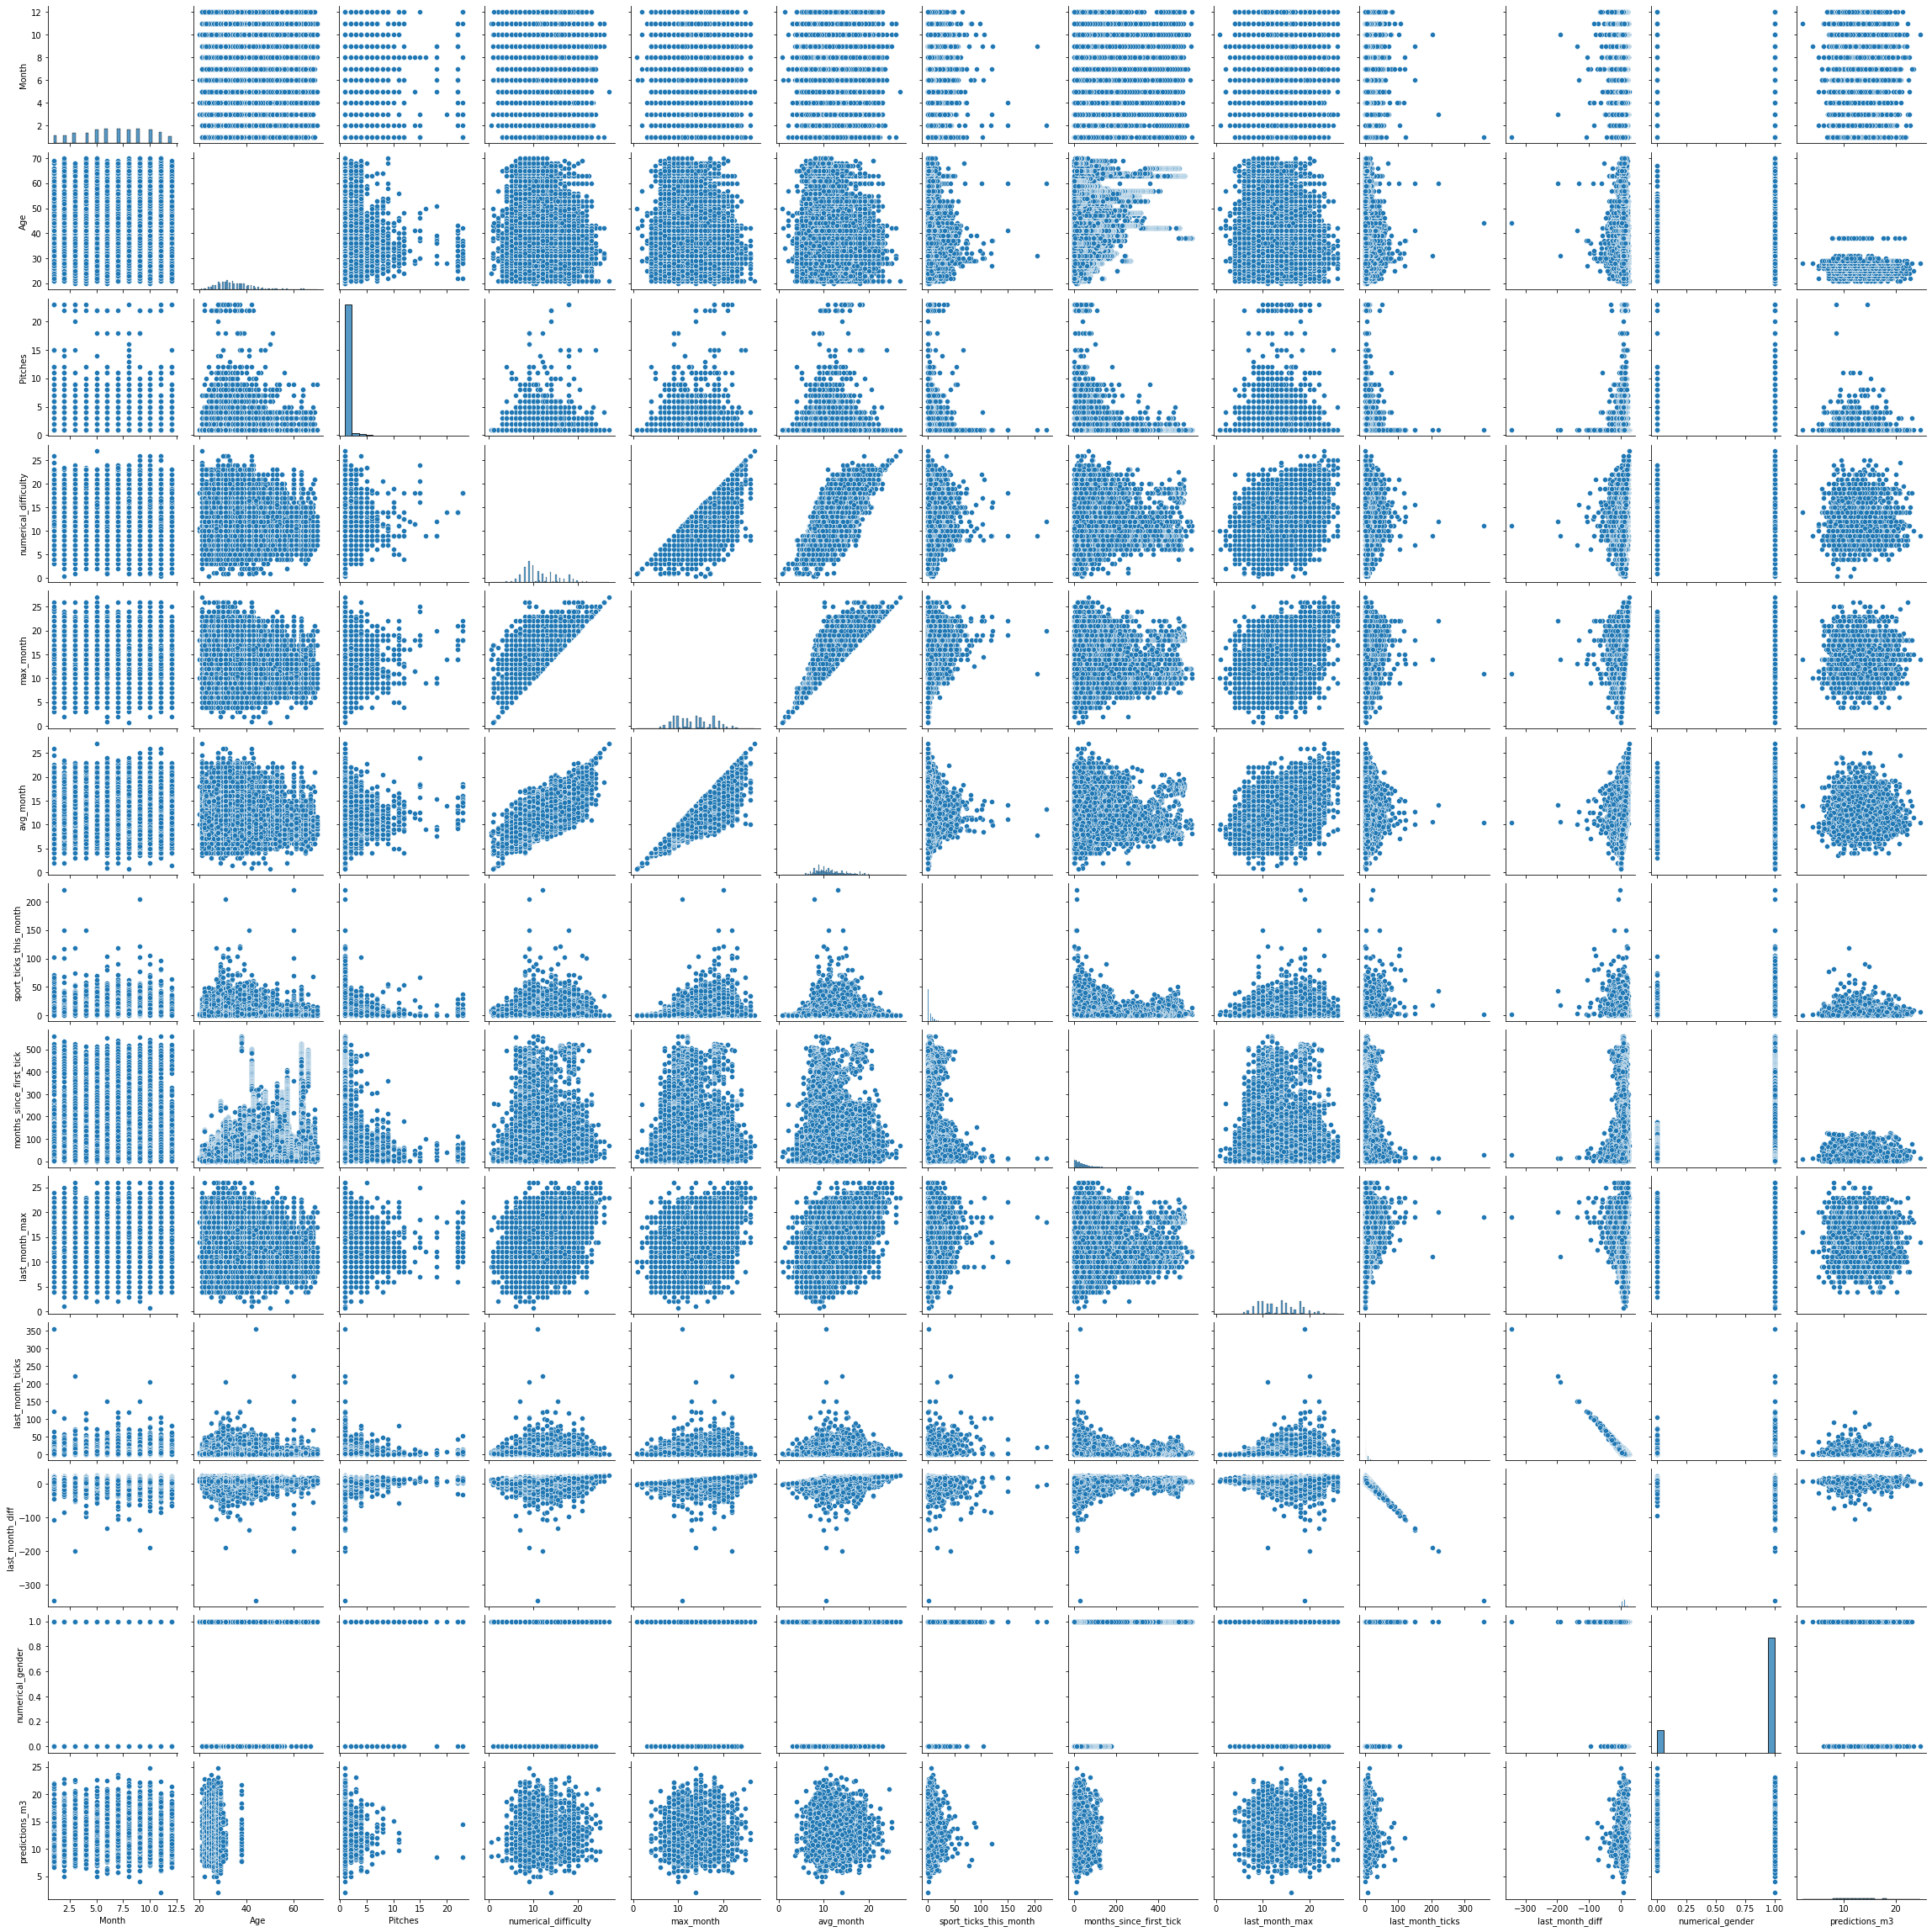

In [281]:
sns.pairplot(df_sport)

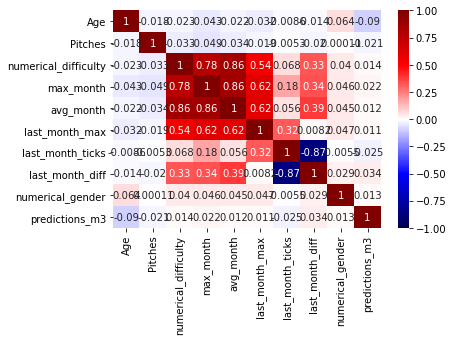

In [282]:
sns.heatmap(df_sport.corr(), cmap="seismic", annot=True, vmin=-1, vmax=1);

In [255]:
# Make a dictionary where the keys are the climbing grades and values are the
# number of times that grade has been listed as a max grade within a month.
df_grades = {}
for climb_grade in df_sport['max_month'].unique():
    df_grade = df_sport[df_sport['max_month'] == climb_grade]
    len_grade = len(df_grade)
    df_grades[climb_grade] = len_grade

In [259]:
df_grades

{15.0: 21446,
 14.0: 23360,
 11.0: 13344,
 24.0: 227,
 20.0: 10283,
 22.0: 7275,
 18.0: 26931,
 17.0: 10152,
 16.0: 13214,
 19.0: 19186,
 5.0: 155,
 4.0: 129,
 24.5: 3,
 23.0: 2035,
 10.0: 13582,
 8.0: 4892,
 18.5: 1380,
 9.0: 10566,
 11.5: 2730,
 10.5: 1510,
 12.0: 14714,
 7.0: 1882,
 21.0: 3972,
 6.0: 701,
 12.5: 1774,
 13.0: 11275,
 15.5: 1844,
 14.5: 1900,
 16.5: 1506,
 22.5: 545,
 26.0: 176,
 19.5: 779,
 3.0: 12,
 25.0: 201,
 20.5: 397,
 23.5: 74,
 2.0: 8,
 27.0: 1,
 1.0: 1,
 0.8: 1}

In [257]:
keys = df_grades.keys()
values = df_grades.values()

<BarContainer object of 40 artists>

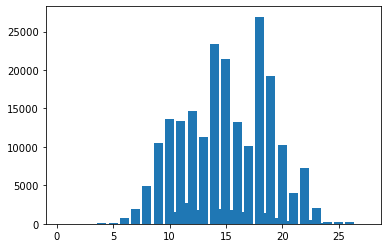

In [258]:
plt.bar(keys, values)

# Add columns

## Months since first tick

In [63]:
# Make a new column of the date of the first tick for each user
df_sport['first_tick'] = df_sport.groupby(['Name']).month_year.transform('min')

# Get it into format that can be converted to datetime object
df_sport['first_tick'] = df_sport['first_tick'].str.replace('-','')

# Convert to datetime object
df_sport['first_tick'] = pd.to_datetime(df_sport.first_tick, format='%Y%m')

In [64]:
# Get month_year column into format that can be converted to datetime object
df_sport['month_year'] = df_sport['month_year'].str.replace('-','')

# Convert to datetime object
df_sport['month_year'] = pd.to_datetime(df_sport.month_year, format='%Y%m')

In [65]:
df_sport['months_since_first_tick'] = 12 * (df_sport['month_year'].dt.year - df_sport['first_tick'].dt.year) + (df_sport['month_year'].dt.month - df_sport['first_tick'].dt.month)


In [66]:
df_sport.head()

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,first_tick,months_since_first_tick
0,2020-12-19,Aidan Shelburne,12,2020-12-01,Male,21.0,5.11b,TR,NaN,1.0,15.0,15.0,15.00,1,2019-10-01,14
1,2020-08-06,Aidan Shelburne,8,2020-08-01,Male,21.0,5.11a,Lead,Onsight,1.0,14.0,14.0,11.75,4,2019-10-01,10
2,2020-08-06,Aidan Shelburne,8,2020-08-01,Male,21.0,5.10a,Lead,NaN,1.0,10.0,14.0,11.75,4,2019-10-01,10
3,2020-08-06,Aidan Shelburne,8,2020-08-01,Male,21.0,5.10,Lead,NaN,1.0,11.5,14.0,11.75,4,2019-10-01,10
4,2020-08-06,Aidan Shelburne,8,2020-08-01,Male,21.0,5.10,Lead,NaN,1.0,11.5,14.0,11.75,4,2019-10-01,10


## Previous max difficulty and previous ticks

In [67]:
df_sport = df_sport.drop_duplicates(subset = ['Name', 'month_year'])

In [68]:
names = df_sport.Name.unique()

In [69]:
# Add the previous entry's difficulty and number of ticks to the df's column
df = pd.DataFrame(columns = ['Date', 'Name', 'Month', 'month_year', 'Gender', 'Age', 'Rating', 'Style', 'Lead Style',
                            'Pitches', 'numerical_difficulty', 'max_month', 'avg_month', 'sport_ticks_this_month',
                            'first_tick', 'months_since_first_tick', 'last_month_max', 'last_month_ticks']) 
for name in names:
    user_df = df_sport[df_sport['Name'] == name]
    user_df['last_month_max'] = user_df['max_month'].shift(-1)
    user_df['last_month_ticks'] = user_df['sport_ticks_this_month'].shift(-1)
    user_df['last_month_diff'] = user_df['max_month'] - user_df['last_month_ticks']
    df = df.append(user_df, ignore_index=True)

df

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,first_tick,months_since_first_tick,last_month_max,last_month_ticks,last_month_diff
0,2020-12-19,Aidan Shelburne,12,2020-12-01,Male,21.0,5.11b,TR,NaN,1.0,15.0,15.0,15.000000,1,2019-10-01,14,14.0,4.0,11.0
1,2020-08-06,Aidan Shelburne,8,2020-08-01,Male,21.0,5.11a,Lead,Onsight,1.0,14.0,14.0,11.750000,4,2019-10-01,10,11.0,4.0,10.0
2,2020-07-16,Aidan Shelburne,7,2020-07-01,Male,21.0,5.10b,Lead,Onsight,1.0,11.0,11.0,9.750000,4,2019-10-01,9,15.0,2.0,9.0
3,2019-10-19,Aidan Shelburne,10,2019-10-01,Male,21.0,5.11a,Lead,Redpoint,1.0,14.0,15.0,14.500000,2,2019-10-01,0,NaN,NaN,NaN
4,2021-03-07,Alex Holmann,3,2021-03-01,Male,21.0,5.13c,TR,NaN,1.0,24.0,24.0,20.666667,3,2018-12-01,27,20.0,1.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39446,2017-01-07,Tracey Pomeroy,1,2017-01-01,Female,65.0,5.9,Lead,Onsight,1.0,9.0,9.0,9.000000,1,2014-05-01,32,11.0,3.0,6.0
39447,2015-08-15,Tracey Pomeroy,8,2015-08-01,Female,65.0,5.9,NaN,NaN,1.0,9.0,11.0,10.000000,3,2014-05-01,15,12.0,3.0,8.0
39448,2015-07-18,Tracey Pomeroy,7,2015-07-01,Female,65.0,5.10c R,NaN,NaN,1.0,12.0,12.0,10.000000,3,2014-05-01,14,9.0,2.0,10.0
39449,2015-06-06,Tracey Pomeroy,6,2015-06-01,Female,65.0,5.7 PG13,NaN,NaN,3.0,7.0,9.0,8.000000,2,2014-05-01,13,11.0,5.0,4.0


In [70]:
df.shape

(39451, 19)

In [71]:
# Remove the first entry of each person, since they can't be predicted.
df = df.dropna(subset=['last_month_max'])

In [72]:
df.shape

(36030, 19)

In [73]:
df_sport = df

# First Attempt: Fitting on Every User

## Baseline Model

In [74]:
def rmse(ytrue, ypred):
    return np.sqrt(mean_squared_error(ytrue, ypred))

### Model 1

In [175]:
names = df_sport.Name.unique()

predictions = []
validations = []
for name in names:
    user_df = df_sport[df_sport['Name'] == name]
    
    validate = user_df.iloc[0]['max_month']
    train = user_df.iloc[1::]['max_month']
    
    prediction = user_df.iloc[0]['last_month_max']
    
    predictions.append(prediction)
    validations.append(validate)
    
print('Mean Error: ', rmse(validations, predictions))

Mean Error:  3.49889979774517


This is the score I'm aiming to beat in future models.

## Random Forest Model

### Model 2: using one lag and climb start date

In [182]:
df_sport.head()

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,first_tick,months_since_first_tick,last_month_max,last_month_ticks,last_month_diff
0,2020-12-19,Aidan Shelburne,12,2020-12-01,Male,21.0,5.11b,TR,NaN,1.0,15.0,15.0,15.000000,1,2019-10-01,14,14.0,4.0,11.0
1,2020-08-06,Aidan Shelburne,8,2020-08-01,Male,21.0,5.11a,Lead,Onsight,1.0,14.0,14.0,11.750000,4,2019-10-01,10,11.0,4.0,10.0
2,2020-07-16,Aidan Shelburne,7,2020-07-01,Male,21.0,5.10b,Lead,Onsight,1.0,11.0,11.0,9.750000,4,2019-10-01,9,15.0,2.0,9.0
4,2021-03-07,Alex Holmann,3,2021-03-01,Male,21.0,5.13c,TR,NaN,1.0,24.0,24.0,20.666667,3,2018-12-01,27,20.0,1.0,23.0
5,2021-02-06,Alex Holmann,2,2021-02-01,Male,21.0,5.12c/d,Lead,Redpoint,1.0,20.0,20.0,20.000000,1,2018-12-01,26,22.0,12.0,8.0


In [194]:
mean_error = []

predictions = []
validations = []
for name in names:
    user_df = df_sport[df_sport['Name'] == name]
    
    val = user_df.iloc[0]
    train = user_df.iloc[1::]
    
    x_train = train[['last_month_max', 'months_since_first_tick']]
    y_train = train['max_month']
    
    x_test = val[['last_month_max', 'months_since_first_tick']]
    y_test = val['max_month']
  
    try:
        mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    
        mdl.fit(x_train, y_train)
    
        x_test = np.array(x_test)
        x_test = x_test.reshape(1, -1)
        prediction = mdl.predict(x_test)
    
        predictions.append(prediction)
        validations.append(y_test)
        
    except:
        pass
    
print('Mean Error: ', rmse(validations, predictions))  

Mean Error:  3.1512446053339214


### Model 3: using one lag, gender, age, and month

In [75]:
# Turn gender column into numerical format.
df_sport['numerical_gender'] = pd.get_dummies(df_sport['Gender'])['Male']

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [207]:
df_sport

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,numerical_difficulty,max_month,avg_month,sport_ticks_this_month,first_tick,months_since_first_tick,last_month_max,last_month_ticks,last_month_diff,numerical_gender
0,2020-12-19,Aidan Shelburne,12,2020-12-01,Male,21.0,5.11b,TR,NaN,1.0,15.0,15.0,15.000000,1,2019-10-01,14,14.0,4.0,11.0,1
1,2020-08-06,Aidan Shelburne,8,2020-08-01,Male,21.0,5.11a,Lead,Onsight,1.0,14.0,14.0,11.750000,4,2019-10-01,10,11.0,4.0,10.0,1
2,2020-07-16,Aidan Shelburne,7,2020-07-01,Male,21.0,5.10b,Lead,Onsight,1.0,11.0,11.0,9.750000,4,2019-10-01,9,15.0,2.0,9.0,1
4,2021-03-07,Alex Holmann,3,2021-03-01,Male,21.0,5.13c,TR,NaN,1.0,24.0,24.0,20.666667,3,2018-12-01,27,20.0,1.0,23.0,1
5,2021-02-06,Alex Holmann,2,2021-02-01,Male,21.0,5.12c/d,Lead,Redpoint,1.0,20.0,20.0,20.000000,1,2018-12-01,26,22.0,12.0,8.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39445,2017-08-26,Tracey Pomeroy,8,2017-08-01,Female,65.0,5.10a,Lead,Redpoint,1.0,10.0,10.0,9.666667,3,2014-05-01,39,9.0,1.0,9.0,0
39446,2017-01-07,Tracey Pomeroy,1,2017-01-01,Female,65.0,5.9,Lead,Onsight,1.0,9.0,9.0,9.000000,1,2014-05-01,32,11.0,3.0,6.0,0
39447,2015-08-15,Tracey Pomeroy,8,2015-08-01,Female,65.0,5.9,NaN,NaN,1.0,9.0,11.0,10.000000,3,2014-05-01,15,12.0,3.0,8.0,0
39448,2015-07-18,Tracey Pomeroy,7,2015-07-01,Female,65.0,5.10c R,NaN,NaN,1.0,12.0,12.0,10.000000,3,2014-05-01,14,9.0,2.0,10.0,0


In [210]:
mean_error = []

predictions = []
validations = []
for name in names:
    user_df = df_sport[df_sport['Name'] == name]
    
    val = user_df.iloc[0]
    train = user_df.iloc[1::]
    
    x_train = train[['last_month_max', 'months_since_first_tick', 'numerical_gender', 'Age', 
                     'last_month_ticks', 'Month']]
    y_train = train['max_month']
    
    x_test = val[['last_month_max', 'months_since_first_tick', 'numerical_gender', 'Age', 
                     'last_month_ticks', 'Month']]
    y_test = val['max_month']
    
    try:
        mdl = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    
        mdl.fit(x_train, y_train)
    
        x_test = np.array(x_test)
        x_test = x_test.reshape(1, -1)
        prediction = mdl.predict(x_test)
        
        print(prediction)
        predictions.append(prediction)
        validations.append(y_test)
        
    except:
        pass

print('Mean Error: ', rmse(validations, predictions)) 

[12.881]
[20.307]
[20.385]
[18.007]
[16.141]
[10.716]
[16.855]
[15.973]
[15.737]
[15.144]
[18.444]
[9.083]
[9.785]
[7.906]
[12.115]
[9.2535]
[16.9525]
[8.594]
[16.877]
[8.786]
[12.987]
[10.006]
[12.4965]
[15.047]
[20.8815]
[13.133]
[13.2675]
[14.237]
[14.5]
[18.448]
[14.]
[22.7425]
[16.885]
[10.]
[12.199]
[12.93]
[9.518]
[9.]
[16.954]
[10.445]
[17.082]
[12.515]
[13.494]
[12.528]
[18.]
[11.7665]
[12.]
[11.977]
[15.4565]
[15.082]
[18.515]
[14.411]
[12.]
[16.7555]
[17.62]
[11.172]
[13.041]
[10.7135]
[9.751]
[9.]
[10.414]
[11.5]
[18.]
[10.8905]
[11.199]
[8.394]
[12.748]
[15.684]
[14.996]
[12.862]
[18.699]
[18.256]
[12.849]
[11.]
[15.063]
[15.971]
[13.773]
[14.706]
[18.8165]
[11.192]
[9.958]
[10.856]
[15.05]
[10.603]
[15.064]
[15.35]
[18.]
[19.461]
[5.]
[18.516]
[19.101]
[8.]
[9.897]
[17.604]
[10.]
[16.403]
[14.]
[19.137]
[13.7425]
[17.066]
[13.223]
[14.475]
[8.353]
[21.412]
[10.811]
[12.53]
[8.]
[10.665]
[12.9515]
[14.12]
[11.45]
[16.316]
[8.44]
[7.477]
[10.318]
[15.865]
[12.845]
[8.]
[12.

[8.158]
[10.6]
[10.61]
[15.907]
[11.4215]
[10.838]
[18.1455]
[14.273]
[10.583]
[12.]
[15.288]
[12.6]
[13.61]
[11.073]
[14.048]
[14.4065]
[9.168]
[16.253]
[12.926]
[13.37]
[13.304]
[14.967]
[10.932]
[20.348]
[13.343]
[8.097]
[14.6425]
[12.]
[12.]
[12.654]
[13.918]
[14.]
[13.0735]
[15.7375]
[12.11]
[9.7525]
[14.955]
[12.4105]
[11.291]
[10.251]
[13.]
[14.]
[9.9505]
[14.942]
[9.916]
[10.168]
[9.333]
[12.103]
[11.814]
[12.064]
[17.9155]
[9.922]
[7.737]
[18.322]
[9.996]
[14.02]
[11.934]
[11.]
[11.078]
[20.425]
[10.226]
[9.448]
[14.5795]
[9.7175]
[7.]
[17.]
[10.861]
[8.8255]
[15.592]
[13.888]
[13.237]
[10.253]
[11.886]
[19.0505]
[16.018]
[17.265]
[11.]
[17.058]
[12.563]
[11.8675]
[10.]
[14.339]
[16.9015]
[8.538]
[13.]
[9.656]
[22.556]
[11.049]
[9.406]
[17.]
[9.671]
[11.466]
[9.006]
[11.932]
[10.]
[13.4605]
[9.958]
[13.5045]
[11.585]
[10.086]
[14.5]
[11.937]
[22.434]
[12.443]
[14.]
[9.208]
[13.199]
[10.792]
[10.]
[17.86]
[9.377]
[13.2]
[9.315]
[10.]
[12.462]
[11.268]
[11.508]
[8.]
[12.572]
[9.

[8.373]
[11.722]
[15.]
[10.907]
[9.423]
[18.736]
[8.]
[10.273]
[8.]
[13.06]
[11.543]
[18.818]
[13.042]
[17.519]
[15.545]
[14.]
[7.]
[9.61]
[10.098]
[22.18]
[11.016]
[11.937]
[10.117]
[9.732]
[13.976]
[10.85]
[18.86]
[24.816]
[12.8445]
[12.522]
[13.267]
[9.]
[14.622]
[19.243]
[15.]
[6.08]
[20.689]
[11.863]
[14.76]
[18.868]
[12.72]
[15.491]
[13.96]
[14.728]
[15.396]
[8.801]
[19.068]
[10.085]
[18.086]
[6.7765]
[9.747]
[8.833]
[8.522]
[9.]
[9.056]
[9.97]
[14.466]
[18.036]
[12.537]
[11.801]
[18.]
[10.865]
[15.36]
[12.238]
[5.445]
[9.]
[10.9045]
[7.774]
[10.846]
[12.769]
[14.473]
[10.198]
[10.343]
[10.168]
[7.548]
[18.525]
[10.]
[9.0995]
[11.589]
[8.774]
[15.2075]
[18.376]
[15.509]
[11.593]
[12.211]
[12.843]
[9.2365]
[9.41]
[10.5425]
[13.4915]
[19.844]
[11.516]
[8.804]
[20.289]
[6.]
[14.996]
[9.]
[11.036]
[8.676]
[7.549]
[7.735]
[13.]
[8.729]
[12.8]
[8.]
[9.]
[13.091]
[9.833]
[14.]
[14.]
[11.8325]
[10.]
[14.3105]
[9.45]
[14.355]
[13.487]
[9.564]
[9.213]
[11.475]
[8.44]
[6.075]
[10.089]
[7.51

In [274]:
# Make a sorted list of features and their importance values
# NOTE: This is only for the final user!
feature_imp = pd.Series(mdl.feature_importances_,index=x_train.columns).sort_values(ascending=False)
feature_imp


Month                      0.427696
months_since_first_tick    0.233993
last_month_ticks           0.206310
last_month_max             0.132000
Age                        0.000000
numerical_gender           0.000000
dtype: float64

No handles with labels found to put in legend.


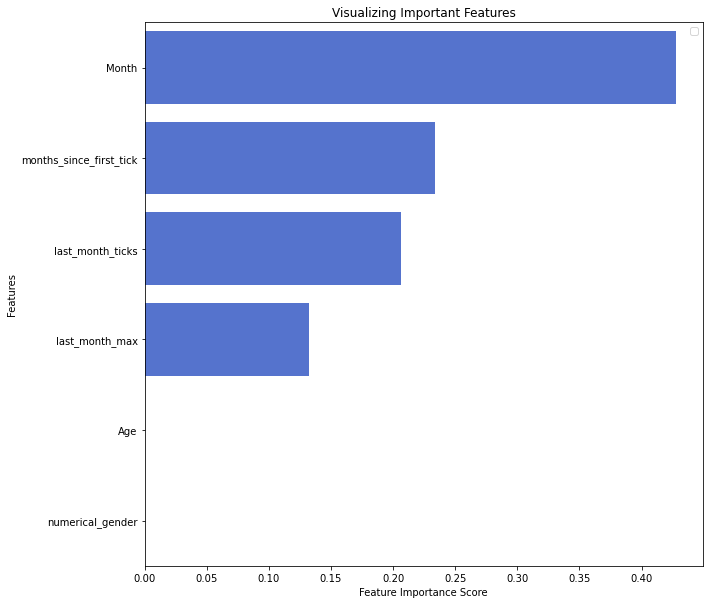

In [218]:
fig, ax = plt.subplots(figsize=(10, 10))
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index, color='royalblue')
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [256]:
len(predictions)

2564

In [257]:
flat_list = [item for sublist in predictions for item in sublist]

In [258]:
flat_list = np.array(flat_list)

In [259]:
prediction_s = pd.Series(flat_list)

In [262]:
df_sport_predictions = df_sport.copy()

In [263]:
df_sport_predictions.drop_duplicates(subset='Name', keep = 'first')

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,...,max_month,avg_month,sport_ticks_this_month,first_tick,months_since_first_tick,last_month_max,last_month_ticks,last_month_diff,numerical_gender,predictions_m3
0,2020-12-19,Aidan Shelburne,12,2020-12-01,Male,21.0,5.11b,TR,NaN,1.0,...,15.0,15.000000,1,2019-10-01,14,14.0,4.0,11.0,1,12.8810
4,2021-03-07,Alex Holmann,3,2021-03-01,Male,21.0,5.13c,TR,NaN,1.0,...,24.0,20.666667,3,2018-12-01,27,20.0,1.0,23.0,1,16.1410
24,2021-01-18,Benjamin Spook,1,2021-01-01,Male,21.0,5.13+ R,Lead,Redpoint,1.0,...,24.5,24.500000,1,2019-03-01,22,22.0,1.0,23.5,1,20.8815
31,2021-02-22,Beckett Aizeki,2,2021-02-01,Male,22.0,5.11b,Lead,Flash,1.0,...,15.0,15.000000,2,2019-06-01,20,20.0,4.0,11.0,1,22.7425
37,2018-05-27,Kristen Lutz,5,2018-05-01,Female,21.0,5.12a,Lead,Onsight,1.0,...,18.0,18.000000,1,2017-11-01,6,17.0,2.0,16.0,0,9.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39378,2008-08-09,Ann,8,2008-08-01,Female,53.0,5.10a,NaN,NaN,1.0,...,15.0,12.000000,4,2006-08-01,24,10.0,2.0,13.0,0,NaN
39383,2012-06-16,Greg Gibson,6,2012-06-01,Male,54.0,5.8,NaN,NaN,1.0,...,8.0,8.000000,1,2006-11-01,67,13.0,1.0,7.0,1,NaN
39386,2009-06-22,TinCrow,6,2009-06-01,Male,53.0,5.11b PG13,NaN,NaN,1.0,...,15.0,15.000000,1,2007-04-01,26,11.0,1.0,14.0,1,NaN
39394,2020-12-29,Neal Lischner,12,2020-12-01,Male,61.0,5.8,Lead,Redpoint,1.0,...,9.0,7.000000,3,2016-09-01,51,14.0,8.0,1.0,1,NaN


In [264]:
df_sport_predictions.shape

(36030, 21)

In [ ]:
df_sport['predictions_m3'] = prediction_s

In [241]:
df_sport['predictions_m3'] = prediction_s

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [243]:
df_sport[['Name', 'Date', 'max_month', 'predictions_m3']].head(20)

,Name,Date,max_month,predictions_m3
0,Aidan Shelburne,2020-12-19,15.0,12.8810
1,Aidan Shelburne,2020-08-06,14.0,20.3070
2,Aidan Shelburne,2020-07-16,11.0,20.3850
4,Alex Holmann,2021-03-07,24.0,16.1410
5,Alex Holmann,2021-02-06,20.0,10.7160
6,Alex Holmann,2021-01-30,22.0,16.8550
7,Alex Holmann,2020-11-07,20.0,15.9730
8,Alex Holmann,2020-10-18,22.0,15.7370
9,Alex Holmann,2020-09-27,22.0,15.1440
10,Alex Holmann,2020-08-30,22.0,18.4440


In [246]:
df_sport

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,...,max_month,avg_month,sport_ticks_this_month,first_tick,months_since_first_tick,last_month_max,last_month_ticks,last_month_diff,numerical_gender,predictions_m3
0,2020-12-19,Aidan Shelburne,12,2020-12-01,Male,21.0,5.11b,TR,NaN,1.0,...,15.0,15.000000,1,2019-10-01,14,14.0,4.0,11.0,1,12.881
1,2020-08-06,Aidan Shelburne,8,2020-08-01,Male,21.0,5.11a,Lead,Onsight,1.0,...,14.0,11.750000,4,2019-10-01,10,11.0,4.0,10.0,1,20.307
2,2020-07-16,Aidan Shelburne,7,2020-07-01,Male,21.0,5.10b,Lead,Onsight,1.0,...,11.0,9.750000,4,2019-10-01,9,15.0,2.0,9.0,1,20.385
4,2021-03-07,Alex Holmann,3,2021-03-01,Male,21.0,5.13c,TR,NaN,1.0,...,24.0,20.666667,3,2018-12-01,27,20.0,1.0,23.0,1,16.141
5,2021-02-06,Alex Holmann,2,2021-02-01,Male,21.0,5.12c/d,Lead,Redpoint,1.0,...,20.0,20.000000,1,2018-12-01,26,22.0,12.0,8.0,1,10.716
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39445,2017-08-26,Tracey Pomeroy,8,2017-08-01,Female,65.0,5.10a,Lead,Redpoint,1.0,...,10.0,9.666667,3,2014-05-01,39,9.0,1.0,9.0,0,NaN
39446,2017-01-07,Tracey Pomeroy,1,2017-01-01,Female,65.0,5.9,Lead,Onsight,1.0,...,9.0,9.000000,1,2014-05-01,32,11.0,3.0,6.0,0,NaN
39447,2015-08-15,Tracey Pomeroy,8,2015-08-01,Female,65.0,5.9,NaN,NaN,1.0,...,11.0,10.000000,3,2014-05-01,15,12.0,3.0,8.0,0,NaN
39448,2015-07-18,Tracey Pomeroy,7,2015-07-01,Female,65.0,5.10c R,NaN,NaN,1.0,...,12.0,10.000000,3,2014-05-01,14,9.0,2.0,10.0,0,NaN


### Model 4: 2 lags!

In [249]:
# Add the previous 2 entry's difficulty and number of ticks to the df's column

names = df_sport.Name.unique()

df = pd.DataFrame(columns = ['Date', 'Name', 'Month', 'month_year', 'Gender', 'Age', 'Rating', 'Style', 'Lead Style',
                            'Pitches', 'numerical_difficulty', 'max_month', 'avg_month', 'sport_ticks_this_month',
                            'first_tick', 'months_since_first_tick', 'last_month_max', 'last_month_ticks', 'last_month_diff',
                            'numerical_gender', 'predictions_m3']) 
for name in names:
    user_df = df_sport[df_sport['Name'] == name]
    user_df['prev_2_max'] = user_df['last_month_max'].shift(-1)
    user_df['prev_2_ticks'] = user_df['last_month_ticks'].shift(-1)
    user_df['prev_2_max_diff'] = user_df['max_month'] - user_df['prev_2_max']
    df = df.append(user_df, ignore_index=True)

df

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be se

,Date,Name,Month,month_year,Gender,Age,Rating,Style,Lead Style,Pitches,...,first_tick,months_since_first_tick,last_month_max,last_month_ticks,last_month_diff,numerical_gender,predictions_m3,prev_2_max,prev_2_ticks,prev_2_max_diff
0,2020-12-19,Aidan Shelburne,12,2020-12-01,Male,21.0,5.11b,TR,NaN,1.0,...,2019-10-01,14,14.0,4.0,11.0,1,12.881,11.0,4.0,4.0
1,2020-08-06,Aidan Shelburne,8,2020-08-01,Male,21.0,5.11a,Lead,Onsight,1.0,...,2019-10-01,10,11.0,4.0,10.0,1,20.307,15.0,2.0,-1.0
2,2020-07-16,Aidan Shelburne,7,2020-07-01,Male,21.0,5.10b,Lead,Onsight,1.0,...,2019-10-01,9,15.0,2.0,9.0,1,20.385,NaN,NaN,NaN
3,2021-03-07,Alex Holmann,3,2021-03-01,Male,21.0,5.13c,TR,NaN,1.0,...,2018-12-01,27,20.0,1.0,23.0,1,16.141,22.0,12.0,2.0
4,2021-02-06,Alex Holmann,2,2021-02-01,Male,21.0,5.12c/d,Lead,Redpoint,1.0,...,2018-12-01,26,22.0,12.0,8.0,1,10.716,20.0,5.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36025,2017-08-26,Tracey Pomeroy,8,2017-08-01,Female,65.0,5.10a,Lead,Redpoint,1.0,...,2014-05-01,39,9.0,1.0,9.0,0,NaN,11.0,3.0,-1.0
36026,2017-01-07,Tracey Pomeroy,1,2017-01-01,Female,65.0,5.9,Lead,Onsight,1.0,...,2014-05-01,32,11.0,3.0,6.0,0,NaN,12.0,3.0,-3.0
36027,2015-08-15,Tracey Pomeroy,8,2015-08-01,Female,65.0,5.9,NaN,NaN,1.0,...,2014-05-01,15,12.0,3.0,8.0,0,NaN,9.0,2.0,2.0
36028,2015-07-18,Tracey Pomeroy,7,2015-07-01,Female,65.0,5.10c R,NaN,NaN,1.0,...,2014-05-01,14,9.0,2.0,10.0,0,NaN,11.0,5.0,1.0


In [250]:
df.shape

(36030, 24)

In [267]:
# Remove the first entry of each person, since they can't be predicted.
df = df.dropna(subset=['prev_2_max'])

In [268]:
df.shape

(33108, 24)

In [269]:
df_lags2 = df

In [277]:
mean_error = []

predictions = []
validations = []
for name in names[:3]:
    user_df = df_lags2[df_lags2['Name'] == name]
    
    val = user_df.iloc[0]
    train = user_df.iloc[1::]
    
    x_train = train[['last_month_max', 'months_since_first_tick', 'numerical_gender', 'Age', 
                     'last_month_ticks', 'Month', 'prev_2_max', 
                     'prev_2_ticks']]
    y_train = train['max_month']
    
    x_test = val[['last_month_max', 'months_since_first_tick', 'numerical_gender', 'Age', 
                'last_month_ticks', 'Month', 'prev_2_max', 
                'prev_2_ticks']]
    y_test = val['max_month']
  
    try:
        mdl4 = RandomForestRegressor(n_estimators=1000, n_jobs=-1, random_state=0)
    
        mdl4.fit(x_train, y_train)
    
        x_test = np.array(x_test)
        x_test = x_test.reshape(1, -1)
        prediction = mdl4.predict(x_test)
    
        predictions.append(prediction)
        validations.append(y_test)
        
        feature_imp = pd.Series(mdl4.feature_importances_,index=x_train.columns).sort_values(ascending=False)
        
        
        
    except:
        pass
    
print('Mean Error: ', rmse(validations, predictions)) 

Mean Error:  3.120805024348686


# Second Attempt: Not fitting on every user

In [76]:
df_sport.shape

(36030, 20)

In [77]:
# Shuffle the rows
df_shuffled = df_sport.sample(frac = 1) 

In [78]:
#Split into 80-20 training data and test data.
eighty_percent = int(len(df_shuffled.index)*.8)
train = df_shuffled.iloc[:eighty_percent]
test = df_shuffled.iloc[eighty_percent:]
print("Shape of new dataframes - {} , {}".format(train.shape, test.shape)) 

train.to_csv('train_data_regr.csv')
test.to_csv('test_data_regr.csv')

Shape of new dataframes - (28824, 20) , (7206, 20)


In [79]:
df_train = pd.read_csv('train_data_regr.csv')
df_test = pd.read_csv('test_data_regr.csv')

## Linear Regression Model

### One lag

In [82]:
import math

In [83]:
def split_and_validate(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results.
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit linear regression to training data
    lr_model = LinearRegression()
    lr_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = lr_model.score(X_val, y_val)
    
    # score fit model on train data
    train_score = lr_model.score(X_train, y_train)
    
    # find validation predictions
    val_preds = lr_model.predict(X_val)
    
    # rmse score validation data
    val_rmse = math.sqrt(mean_squared_error(y_val,val_preds))
    
    # find train predictions
    train_preds = lr_model.predict(X_train)
    
    # rmse score train data
    train_rmse = math.sqrt(mean_squared_error(y_train,train_preds))
    
    # report results
    print('\nTrain R^2 score was:', train_score)    
    print('\nValidation R^2 score was:', val_score)
    print('\nTrain RMSE score was:', train_rmse)
    print('\nValidation RMSE score was:', val_rmse)
    print('Feature coefficient results: \n')
    for feature, coef in zip(X.columns, lr_model.coef_):
        print(feature, ':', f'{coef:.2f}')

In [84]:
X = df_train[['last_month_max', 'months_since_first_tick', 'numerical_gender', 
                     'last_month_ticks', 'Month']]
y = df_train['max_month']
split_and_validate(X, y)


Train R^2 score was: 0.39358426598432306

Validation R^2 score was: 0.3822598287899811

Train RMSE score was: 3.1397735621719027

Validation RMSE score was: 3.1261861081438362
Feature coefficient results: 

last_month_max : 0.63
months_since_first_tick : 0.00
numerical_gender : 0.17
last_month_ticks : -0.02
Month : -0.00


In [85]:
df_train['Log(months_since_first_tick)'] = np.log(df_train['months_since_first_tick'])

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [86]:
df_train = df_train[df_train['months_since_first_tick'] > 0]

In [87]:
X = df_train[['last_month_max', 'Log(months_since_first_tick)', 'numerical_gender', 
                     'last_month_ticks', 'Month']]
y = df_train['max_month']
split_and_validate(X, y)


Train R^2 score was: 0.39694506724818035

Validation R^2 score was: 0.38773203648399035

Train RMSE score was: 3.1270763411676055

Validation RMSE score was: 3.1280203396407433
Feature coefficient results: 

last_month_max : 0.61
Log(months_since_first_tick) : 0.24
numerical_gender : 0.14
last_month_ticks : -0.01
Month : 0.00


In [88]:
df_train['Log(last_month_ticks)'] = np.log(df_train['last_month_ticks'])

In [89]:
X = df_train[['last_month_max', 'Log(months_since_first_tick)', 'numerical_gender', 
                     'Log(last_month_ticks)', 'Month']]
y = df_train['max_month']
split_and_validate(X, y)


Train R^2 score was: 0.40082077745862665

Validation R^2 score was: 0.39182234487650025

Train RMSE score was: 3.1170116053675656

Validation RMSE score was: 3.117554327135604
Feature coefficient results: 

last_month_max : 0.63
Log(months_since_first_tick) : 0.24
numerical_gender : 0.13
Log(last_month_ticks) : -0.29
Month : 0.00


### Two lags

In [91]:
# df_shuffled = df_lags2.sample(frac = 1)

In [321]:
# Commented it out so that I don't accidentally save over those files
# Split into 80-20 training data and test data.
# eighty_percent = int(len(df_shuffled.index)*.8)
# train = df_shuffled.iloc[:eighty_percent]
# test = df_shuffled.iloc[eighty_percent:]
# print("Shape of new dataframes - {} , {}".format(train.shape, test.shape)) 

# train.to_csv('train_data_regr2.csv')
# test.to_csv('test_data_regr2.csv')

Shape of new dataframes - (26486, 24) , (6622, 24)


In [92]:
df_train = pd.read_csv('train_data_regr2.csv')
df_test = pd.read_csv('test_data_regr2.csv')

In [93]:
X = df_train[['last_month_max', 'months_since_first_tick', 'numerical_gender', 
                     'last_month_ticks', 'Month', 'prev_2_ticks', 'prev_2_max']]
y = df_train['max_month']
split_and_validate(X, y)


Train R^2 score was: 0.4592436564329593

Validation R^2 score was: 0.43444951048594727

Train RMSE score was: 2.9562156773706003

Validation RMSE score was: 3.0055941463841
Feature coefficient results: 

last_month_max : 0.41
months_since_first_tick : 0.00
numerical_gender : 0.08
last_month_ticks : -0.00
Month : 0.00
prev_2_ticks : -0.02
prev_2_max : 0.36


In [94]:
df_train.Age.isna().sum()

11

In [95]:
df_train.dropna(subset=['Age'], inplace=True)

In [96]:
X = df_train[['last_month_max', 'months_since_first_tick', 'numerical_gender', 
                     'last_month_ticks', 'Month', 'prev_2_ticks', 'prev_2_max', 'Age']]
y = df_train['max_month']
split_and_validate(X, y)


Train R^2 score was: 0.4551006278859062

Validation R^2 score was: 0.45924381110000034

Train RMSE score was: 2.9692520527903024

Validation RMSE score was: 2.9337516813091677
Feature coefficient results: 

last_month_max : 0.41
months_since_first_tick : 0.00
numerical_gender : 0.10
last_month_ticks : -0.00
Month : -0.00
prev_2_ticks : -0.01
prev_2_max : 0.35
Age : -0.02


## Random Forest Regressor Model

In [148]:
def split_and_validate_rf(X, y):
    '''
    For a set of features and target X, y, perform a 80/20 train/val split, 
    fit and validate a linear regression model, and report results.
    '''
    
    # perform train/val split
    X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
    
    # fit random forest regression to training data
    rf_model = RandomForestRegressor(n_estimators=100, n_jobs=-1, random_state=0, max_depth=5)
    rf_model.fit(X_train, y_train)
    
    # score fit model on validation data
    val_score = rf_model.score(X_val, y_val)
    
    # score fit model on train data
    train_score = rf_model.score(X_train, y_train)
    
    # find validation predictions
    val_preds = rf_model.predict(X_val)
    
    # rmse score validation data
    val_rmse = math.sqrt(mean_squared_error(y_val,val_preds))
    
    # find train predictions
    train_preds = rf_model.predict(X_train)
    
    # rmse score train data
    train_rmse = math.sqrt(mean_squared_error(y_train,train_preds))
    
    # report results
    print('\nTrain R^2 score was:', train_score)    
    print('\nValidation R^2 score was:', val_score)
    print('\nTrain RMSE score was:', train_rmse)
    print('\nValidation RMSE score was:', val_rmse)
    print('Feature coefficient results: \n')
    feature_imp = pd.Series(rf_model.feature_importances_,index= X_train.columns).sort_values(ascending=False)
    print(feature_imp)
    
    return rf_model

### One lag

In [137]:
df_train = pd.read_csv('train_data_regr.csv')
df_test = pd.read_csv('test_data_regr.csv')

In [138]:
X = df_train[['last_month_max', 'months_since_first_tick',  
                     'last_month_ticks', 'Month']]
y = df_train['max_month']
split_and_validate_rf(X, y)


Train R^2 score was: 0.41635543472769876

Validation R^2 score was: 0.39821251273205915

Train RMSE score was: 3.0802596065834793

Validation RMSE score was: 3.0855563597849436
Feature coefficient results: 

last_month_max             0.968059
months_since_first_tick    0.019829
last_month_ticks           0.011030
Month                      0.001081
dtype: float64


### Two lags

In [177]:
df_train = pd.read_csv('train_data_regr2.csv')
df_test = pd.read_csv('test_data_regr2.csv')

In [178]:
X = df_train[['last_month_max', 'months_since_first_tick', 'numerical_gender', 
                     'last_month_ticks', 'Month', 'prev_2_ticks', 'prev_2_max']]
y = df_train['max_month']
split_and_validate_rf(X, y)


Train R^2 score was: 0.46995309769732607

Validation R^2 score was: 0.44004292885163054

Train RMSE score was: 2.926796013212691

Validation RMSE score was: 2.9906942213431407
Feature coefficient results: 

last_month_max             0.726601
prev_2_max                 0.267235
months_since_first_tick    0.003132
last_month_ticks           0.001337
prev_2_ticks               0.001259
Month                      0.000331
numerical_gender           0.000105
dtype: float64


RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=0)

### Three lags

In [270]:
df_train = pd.read_csv('train_data_regr2.csv')
df_test = pd.read_csv('test_data_regr2.csv')

In [39]:
df_2 = df_train.append(df_test)

In [40]:
df_2.columns

Index(['Unnamed: 0', 'Date', 'Name', 'Month', 'month_year', 'Gender', 'Age',
       'Rating', 'Style', 'Lead Style', 'Pitches', 'numerical_difficulty',
       'max_month', 'avg_month', 'sport_ticks_this_month', 'first_tick',
       'months_since_first_tick', 'last_month_max', 'last_month_ticks',
       'last_month_diff', 'numerical_gender', 'predictions_m3', 'prev_2_max',
       'prev_2_ticks', 'prev_2_max_diff'],
      dtype='object')

In [41]:
df_2.drop(columns=['Unnamed: 0', 'avg_month', 'first_tick', 'Rating', 'Style', 'Lead Style',
         'Pitches', 'numerical_difficulty', 'last_month_diff', 'predictions_m3', 'prev_2_max_diff'],
         inplace = True)

In [42]:
df_2.columns

Index(['Date', 'Name', 'Month', 'month_year', 'Gender', 'Age', 'max_month',
       'sport_ticks_this_month', 'months_since_first_tick', 'last_month_max',
       'last_month_ticks', 'numerical_gender', 'prev_2_max', 'prev_2_ticks'],
      dtype='object')

In [43]:
# Add the previous 2 entry's difficulty and number of ticks to the df's column

names = df_2.Name.unique()

df = pd.DataFrame(columns = ['Date', 'Name', 'Month', 'month_year', 'Gender', 'Age', 'max_month',
       'sport_ticks_this_month', 'months_since_first_tick', 'last_month_max',
       'last_month_ticks', 'numerical_gender', 'prev_2_max', 'prev_2_ticks']) 
for name in names:
    user_df = df_2[df_2['Name'] == name]
    user_df['prev_3_max'] = user_df['prev_2_max'].shift(-1)
    user_df['prev_3_ticks'] = user_df['prev_2_ticks'].shift(-1)
    df = df.append(user_df, ignore_index=True)

df

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # Remove the CWD from sys.path while we load stuff.
/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()


,Date,Name,Month,month_year,Gender,Age,max_month,sport_ticks_this_month,months_since_first_tick,last_month_max,last_month_ticks,numerical_gender,prev_2_max,prev_2_ticks,prev_3_max,prev_3_ticks
0,2020-09-26,Scott Stevenson,9,2020-09-01,Male,33.0,18.0,16,111,19.0,14.0,1,19.0,14.0,12.0,4.0
1,2017-05-31,Scott Stevenson,5,2017-05-01,Male,33.0,14.0,8,71,18.0,7.0,1,12.0,4.0,12.5,4.0
2,2018-02-17,Scott Stevenson,2,2018-02-01,Male,33.0,12.0,7,80,13.0,6.0,1,12.5,4.0,17.0,3.0
3,2020-07-24,Scott Stevenson,7,2020-07-01,Male,33.0,19.0,14,109,18.0,11.0,1,17.0,3.0,14.0,8.0
4,2017-07-22,Scott Stevenson,7,2017-07-01,Male,33.0,13.0,10,73,16.0,13.0,1,14.0,8.0,6.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33103,2014-06-29,Ryan Kempf,6,2014-06-01,Male,35.0,19.0,1,35,7.0,1.0,1,13.0,1.0,NaN,NaN
33104,2018-06-29,TysonHorrocks,6,2018-06-01,Male,44.0,6.0,1,34,9.0,2.0,1,6.0,1.0,NaN,NaN
33105,2021-01-02,Kat T,1,2021-01-01,Female,37.0,9.0,1,3,9.0,4.0,0,8.0,1.0,NaN,NaN
33106,2008-10-18,Dan Bussius,10,2008-10-01,Male,46.0,9.0,1,14,11.0,1.0,1,10.0,3.0,NaN,NaN


In [44]:
df.shape

(33108, 16)

In [28]:
# Remove the first entry of each person, since they can't be predicted.
df = df.dropna(subset=['prev_3_max'])

In [29]:
df.shape

(30542, 16)

In [30]:
df_lags3 = df

In [31]:
df_shuffled3 = df_lags3.sample(frac = 1)

In [32]:
# Commented out so that I don't accidentally save over those files
# Split into 80-20 training data and test data.
# eighty_percent = int(len(df_shuffled3.index)*.8)
# train = df_shuffled3.iloc[:eighty_percent]
# test = df_shuffled3.iloc[eighty_percent:]
# print("Shape of new dataframes - {} , {}".format(train.shape, test.shape)) 

# train.to_csv('train_data_regr3.csv')
# test.to_csv('test_data_regr3.csv')

Shape of new dataframes - (24433, 16) , (6109, 16)


In [271]:
df_train = pd.read_csv('train_data_regr3.csv')
df_test = pd.read_csv('test_data_regr3.csv')

In [180]:
X = df_train[['last_month_max', 'months_since_first_tick', 'numerical_gender', 
                     'last_month_ticks', 'Month', 'prev_2_ticks', 'prev_2_max', 'prev_3_ticks',
             'prev_3_max']]
y = df_train['max_month']
split_and_validate_rf(X, y)


Train R^2 score was: 0.4922183146906891

Validation R^2 score was: 0.47281408605025577

Train RMSE score was: 2.8586404101052607

Validation RMSE score was: 2.9052517924736727
Feature coefficient results: 

last_month_max             0.695559
prev_2_max                 0.220663
prev_3_max                 0.081047
months_since_first_tick    0.001325
last_month_ticks           0.000670
prev_3_ticks               0.000292
prev_2_ticks               0.000289
Month                      0.000139
numerical_gender           0.000017
dtype: float64


RandomForestRegressor(max_depth=5, n_jobs=-1, random_state=0)

#### Minimum Features

In [279]:
X = df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]
y = df_train['max_month']
rf_model = split_and_validate_rf(X, y)


Train R^2 score was: 0.5503656186444168

Validation R^2 score was: 0.5530690296431876

Train RMSE score was: 2.322516878816624

Validation RMSE score was: 2.2752816371076743
Feature coefficient results: 

last_month_max    0.695293
prev_2_max        0.218572
prev_3_max        0.086135
dtype: float64


In [182]:
df_train['res'] = rf_model.predict(df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]) - df_train['max_month']

In [183]:
df_train.sort_values(['res']).head()

,Unnamed: 0,Date,Name,Month,month_year,Gender,Age,max_month,sport_ticks_this_month,months_since_first_tick,last_month_max,last_month_ticks,numerical_gender,prev_2_max,prev_2_ticks,prev_3_max,prev_3_ticks,res
20848,29813,2016-10-09,Isaac Leija,10,2016-10-01,Male,34.0,22.0,2,8,4.0,1.0,1,4.0,1.0,9.0,1.0,-12.371154
8150,18871,2020-03-29,Caber Russell,3,2020-03-01,Male,25.0,22.0,27,12,10.0,2.0,1,8.0,2.0,10.0,2.0,-11.706604
1691,22144,2019-08-27,Brit Graf,8,2019-08-01,Female,35.0,22.5,12,34,13.0,7.0,0,11.0,3.0,9.0,2.0,-10.710967
13194,12294,2017-04-03,Michael Klein,4,2017-04-01,Male,53.0,22.0,1,275,10.0,1.0,1,13.0,1.0,11.0,17.0,-10.554609
16744,17408,2012-10-23,MattMyers,10,2012-10-01,Male,34.0,23.0,10,31,10.0,5.0,1,16.0,15.0,10.0,5.0,-10.543827


In [184]:
df_train.sort_values(['res']).tail()

,Unnamed: 0,Date,Name,Month,month_year,Gender,Age,max_month,sport_ticks_this_month,months_since_first_tick,last_month_max,last_month_ticks,numerical_gender,prev_2_max,prev_2_ticks,prev_3_max,prev_3_ticks,res
9411,1045,2011-11-26,WAGbag,11,2011-11-01,Male,42.0,7.0,1,43,20.0,18.0,1,22.0,32.0,20.0,27.0,12.871206
1285,9920,2019-11-30,Scott Cox,11,2019-11-01,Male,34.0,4.0,1,90,18.0,6.0,1,18.0,8.0,18.0,13.0,13.077809
3190,25190,2016-09-01,Peter Hurtgen,9,2016-09-01,Male,26.0,8.0,1,56,24.0,2.0,1,24.0,2.0,23.0,7.0,13.382805
4928,1668,2020-11-01,Joseph Beemer,11,2020-11-01,Male,27.0,4.0,1,28,19.0,8.0,1,18.0,7.0,18.0,4.0,13.591645
10082,7691,2019-08-09,Austin Le,8,2019-08-01,Male,29.0,3.0,1,37,19.0,30.0,1,18.0,6.0,16.0,21.0,14.114552


It looks like my model is performing worst when a user has only climbed one route this month.

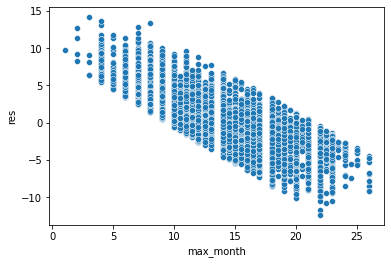

In [185]:
sns.scatterplot(x='max_month', y='res', data=df_train)

My model must not be accounting for something. Definitely room for improvement.

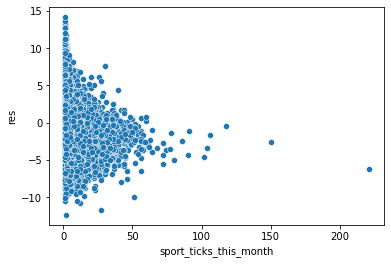

In [186]:
sns.scatterplot(x='sport_ticks_this_month', y='res', data=df_train)

The more ticks there are, the more predictive the model is. You can see the points converging to zero (where zero represents an accurate prediction) as the number of ticks increases.

### Removing users that have only climbed one route this month

In [187]:
df_train = df_train[df_train['sport_ticks_this_month'] > 1]

In [188]:
df_train.shape

(19041, 18)

In [189]:
X = df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]
y = df_train['max_month']
rf_model = split_and_validate_rf(X, y)


Train R^2 score was: 0.5186588681061355

Validation R^2 score was: 0.5036536397991049

Train RMSE score was: 2.639583710609427

Validation RMSE score was: 2.6807959284275404
Feature coefficient results: 

last_month_max    0.697967
prev_2_max        0.224518
prev_3_max        0.077515
dtype: float64


In [190]:
df_train['res'] = rf_model.predict(df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]) - df_train['max_month']

In [191]:
df_train.sort_values(['res']).head()

,Unnamed: 0,Date,Name,Month,month_year,Gender,Age,max_month,sport_ticks_this_month,months_since_first_tick,last_month_max,last_month_ticks,numerical_gender,prev_2_max,prev_2_ticks,prev_3_max,prev_3_ticks,res
20848,29813,2016-10-09,Isaac Leija,10,2016-10-01,Male,34.0,22.0,2,8,4.0,1.0,1,4.0,1.0,9.0,1.0,-11.884800
8150,18871,2020-03-29,Caber Russell,3,2020-03-01,Male,25.0,22.0,27,12,10.0,2.0,1,8.0,2.0,10.0,2.0,-11.607315
1691,22144,2019-08-27,Brit Graf,8,2019-08-01,Female,35.0,22.5,12,34,13.0,7.0,0,11.0,3.0,9.0,2.0,-10.369479
16744,17408,2012-10-23,MattMyers,10,2012-10-01,Male,34.0,23.0,10,31,10.0,5.0,1,16.0,15.0,10.0,5.0,-9.818357
9880,11903,2019-07-31,Louie,7,2019-07-01,Male,28.0,22.0,51,37,10.0,3.0,1,14.0,13.0,12.0,3.0,-9.785494


In [192]:
df_train.sort_values(['res']).tail()

,Unnamed: 0,Date,Name,Month,month_year,Gender,Age,max_month,sport_ticks_this_month,months_since_first_tick,last_month_max,last_month_ticks,numerical_gender,prev_2_max,prev_2_ticks,prev_3_max,prev_3_ticks,res
9674,17251,2014-11-01,Jackie K,11,2014-11-01,Female,37.0,7.0,2,49,19.0,3.0,0,18.0,3.0,8.0,1.0,10.593337
4548,22495,2019-06-14,Alec Finke,6,2019-06-01,Male,23.0,6.0,2,38,16.0,10.0,1,19.0,16.0,11.0,1.0,10.675772
7185,27122,2018-10-08,Davis B.,10,2018-10-01,Male,23.0,8.0,2,37,20.0,6.0,1,18.0,12.0,20.0,6.0,11.190294
20741,6115,2020-10-28,Jake Tomlitz,10,2020-10-01,Male,31.0,4.0,2,49,14.0,3.0,1,16.0,6.0,17.0,6.0,11.192888
16442,30910,2019-06-22,Alex Holmann,6,2019-06-01,Male,21.0,5.0,2,6,18.0,4.0,1,16.0,20.0,22.0,17.0,12.005945


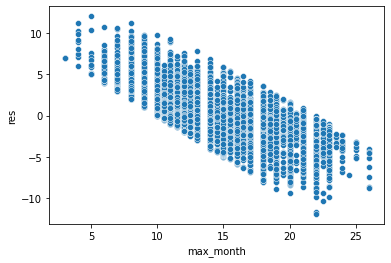

In [193]:
sns.scatterplot(x='max_month', y='res', data=df_train)

### Removing users that have only climbed two routes this month

In [194]:
df_train = df_train[df_train['sport_ticks_this_month'] > 2]

In [195]:
df_train.shape

(15377, 18)

In [196]:
X = df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]
y = df_train['max_month']
rf_model = split_and_validate_rf(X, y)


Train R^2 score was: 0.5332242889215485

Validation R^2 score was: 0.504311103268306

Train RMSE score was: 2.5084326094536973

Validation RMSE score was: 2.5436843565720704
Feature coefficient results: 

last_month_max    0.696710
prev_2_max        0.218708
prev_3_max        0.084581
dtype: float64


In [197]:
df_train['res'] = rf_model.predict(df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]) - df_train['max_month']

In [198]:
df_train.sort_values(['res']).head()

,Unnamed: 0,Date,Name,Month,month_year,Gender,Age,max_month,sport_ticks_this_month,months_since_first_tick,last_month_max,last_month_ticks,numerical_gender,prev_2_max,prev_2_ticks,prev_3_max,prev_3_ticks,res
8150,18871,2020-03-29,Caber Russell,3,2020-03-01,Male,25.0,22.0,27,12,10.0,2.0,1,8.0,2.0,10.0,2.0,-11.234492
1691,22144,2019-08-27,Brit Graf,8,2019-08-01,Female,35.0,22.5,12,34,13.0,7.0,0,11.0,3.0,9.0,2.0,-10.123836
16744,17408,2012-10-23,MattMyers,10,2012-10-01,Male,34.0,23.0,10,31,10.0,5.0,1,16.0,15.0,10.0,5.0,-9.800094
9880,11903,2019-07-31,Louie,7,2019-07-01,Male,28.0,22.0,51,37,10.0,3.0,1,14.0,13.0,12.0,3.0,-9.400770
23376,9069,2017-03-21,Nate Layton,3,2017-03-01,Male,28.0,22.0,15,19,10.0,1.0,1,11.0,6.0,16.0,4.0,-8.903284


In [199]:
df_train.sort_values(['res']).tail()

,Unnamed: 0,Date,Name,Month,month_year,Gender,Age,max_month,sport_ticks_this_month,months_since_first_tick,last_month_max,last_month_ticks,numerical_gender,prev_2_max,prev_2_ticks,prev_3_max,prev_3_ticks,res
23836,13369,2019-05-31,Carson Darling,5,2019-05-01,Male,32.0,7.0,4,44,10.0,2.0,1,18.0,4.0,18.0,13.0,9.268512
17171,15445,2020-07-01,Nick Ludwig,7,2020-07-01,Male,32.0,9.0,3,44,19.0,2.0,1,19.0,3.0,19.0,2.0,9.536105
24017,14190,2017-03-22,Ben Karin,3,2017-03-01,Male,30.0,9.0,4,106,19.0,5.0,1,19.0,6.0,20.0,3.0,9.607628
21553,1750,2018-05-31,Frederick Hijazi,5,2018-05-01,Male,32.0,11.0,3,15,22.0,9.0,1,20.0,18.0,22.0,9.0,9.689773
2274,17952,2018-11-10,Marcus ko,11,2018-11-01,Male,27.0,7.0,3,76,18.0,3.0,1,18.0,2.0,17.0,16.0,10.524990


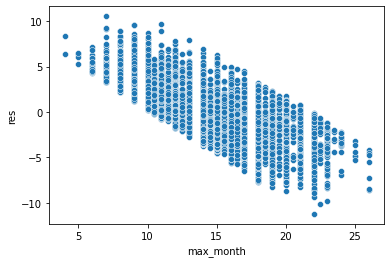

In [200]:
sns.scatterplot(x='max_month', y='res', data=df_train)

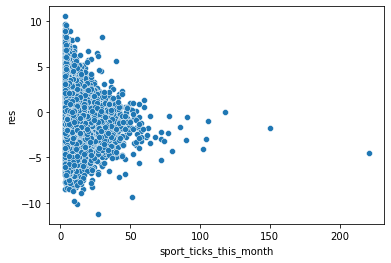

In [201]:
sns.scatterplot(x='sport_ticks_this_month', y='res', data=df_train)

### Only climbers that have climbed over 5 routes this month

In [280]:
df_train = df_train[df_train['sport_ticks_this_month'] > 5]

In [273]:
df_train.shape

(8702, 17)

In [274]:
X = df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]
rf_model = split_and_validate_rf(X, y)


Train R^2 score was: 0.5503656186444168

Validation R^2 score was: 0.5530690296431876

Train RMSE score was: 2.3225168788166246

Validation RMSE score was: 2.2752816371076747
Feature coefficient results: 

last_month_max    0.695293
prev_2_max        0.218572
prev_3_max        0.086135
dtype: float64


In [265]:
df_train['res'] = rf_model.predict(df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]) - df_train['max_month']

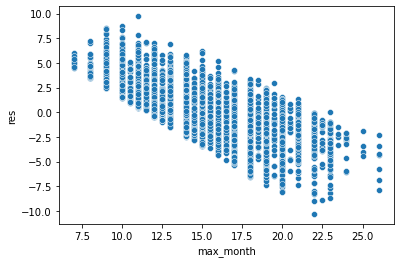

In [266]:
sns.scatterplot(x='max_month', y='res', data=df_train)

In [267]:
df_train.sort_values(['res']).head()

,Unnamed: 0,Date,Name,Month,month_year,Gender,Age,max_month,sport_ticks_this_month,months_since_first_tick,last_month_max,last_month_ticks,numerical_gender,prev_2_max,prev_2_ticks,prev_3_max,prev_3_ticks,res
8150,18871,2020-03-29,Caber Russell,3,2020-03-01,Male,25.0,22.0,27,12,10.0,2.0,1,8.0,2.0,10.0,2.0,-10.303764
9880,11903,2019-07-31,Louie,7,2019-07-01,Male,28.0,22.0,51,37,10.0,3.0,1,14.0,13.0,12.0,3.0,-8.975135
1691,22144,2019-08-27,Brit Graf,8,2019-08-01,Female,35.0,22.5,12,34,13.0,7.0,0,11.0,3.0,9.0,2.0,-8.920083
16744,17408,2012-10-23,MattMyers,10,2012-10-01,Male,34.0,23.0,10,31,10.0,5.0,1,16.0,15.0,10.0,5.0,-8.712654
11488,16755,2018-03-30,D Y,3,2018-03-01,Male,32.0,22.0,8,25,12.0,1.0,1,14.0,3.0,14.0,2.0,-8.265145


In [268]:
df_train.sort_values(['res']).tail()

,Unnamed: 0,Date,Name,Month,month_year,Gender,Age,max_month,sport_ticks_this_month,months_since_first_tick,last_month_max,last_month_ticks,numerical_gender,prev_2_max,prev_2_ticks,prev_3_max,prev_3_ticks,res
863,27264,2012-09-22,Tyson Taylor,9,2012-09-01,Male,37.0,10.0,10,24,22.0,7.0,1,15.0,8.0,11.0,4.0,8.382134
20734,9803,2020-09-27,Julie Wang,9,2020-09-01,Female,28.0,9.0,12,46,16.0,1.0,0,16.0,8.0,21.0,5.0,8.441940
18862,26993,2021-02-25,Bryce Ungersma,2,2021-02-01,Male,32.0,9.0,30,15,18.0,16.0,1,16.0,5.0,18.0,20.0,8.559407
528,6541,2019-11-18,Jono K,11,2019-11-01,Male,26.0,10.0,6,14,18.5,12.0,1,19.0,22.0,18.5,12.0,8.710537
17717,19127,2019-12-31,Julian Barnett,12,2019-12-01,Male,39.0,11.0,7,76,22.0,11.0,1,19.0,9.0,19.0,3.0,9.734673


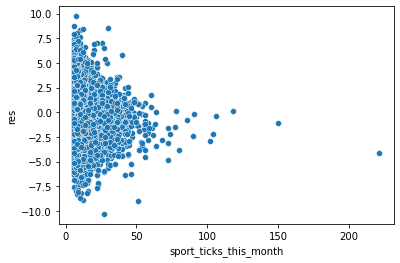

In [269]:
sns.scatterplot(x='sport_ticks_this_month', y='res', data=df_train)

In [278]:
# Get final test scores

df_test = df_test[df_test['sport_ticks_this_month'] > 5]

X = df_test[['last_month_max', 'prev_2_max', 'prev_3_max']]
y = df_test['max_month']

final_test_preds = rf_model.predict(X)

final_test_rmse = math.sqrt(mean_squared_error(y,final_test_preds))
final_test_score = rf_model.score(X, y)

print('Final R^2 Score: ', final_test_score)
print('Final RMSE Score: ', final_test_rmse)

Final R^2 Score:  0.52432428193247
Final RMSE Score:  2.4182976743250735


In [282]:
import random

In [285]:
# Compared to if grade was predicted at random

df_test = df_test[df_test['sport_ticks_this_month'] > 5]

X = df_test[['last_month_max', 'prev_2_max', 'prev_3_max']]
y = df_test['max_month']

random_predictions = []
for i in range(len(y)):
    n = random.randint(0,33)
    random_predictions.append(n)

final_test_rmse = math.sqrt(mean_squared_error(y,random_predictions))

correlation_matrix = np.corrcoef(random_predictions, y)
correlation_xy = correlation_matrix[0,1]
r_squared = correlation_xy**2
#final_test_score = rf_model.score(X, y)

print('Final R^2 Score: ', round(r_squared, 10))
print('Final RMSE Score: ', final_test_rmse)

Final R^2 Score:  0.0001114495
Final RMSE Score:  10.51975353690436


### More than five this month and last month

At this point, with removing users that don't have more than five routes for both last and this month, the model is starting to overfit and we have much less data. I'll be removing only users that have less than five routes for this month in my final model. The final model can be found in the Voila app.

In [215]:
df_train = df_train[df_train['last_month_ticks'] > 5]

In [216]:
df_train.shape

(4579, 18)

In [217]:
X = df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]
y = df_train['max_month']
rf_model = split_and_validate_rf(X, y)


Train R^2 score was: 0.602496171880612

Validation R^2 score was: 0.5466214026702227

Train RMSE score was: 2.1565374852037893

Validation RMSE score was: 2.3056122960114185
Feature coefficient results: 

last_month_max    0.802890
prev_2_max        0.149282
prev_3_max        0.047828
dtype: float64


In [218]:
df_train['res'] = rf_model.predict(df_train[['last_month_max', 'prev_2_max', 'prev_3_max']]) - df_train['max_month']

/Users/kaitlynzeichick/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


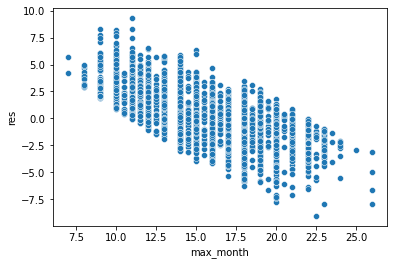

In [219]:
sns.scatterplot(x='max_month', y='res', data=df_train)